<b><font size="6"><u>Ensemble Classifiers</u></font></b>

In this notebook we are going to apply Ensemble Classifiers in Python.

Ensemble Methods, specifically, **bagging, boosting and stacking** combine the results from a set of classification models (classifiers), in order to increase the accuracy and reduce the variability of the classification.

# <font color='#BFD72F'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - Initial Steps](#first-bullet)
    * [1.1 - Connect to Google Colab](#first-bullet)
    * [1.2 - Importing Libraries and Data](#import)
    * [1.3 - Split the Data](#split)
* [2 - Bagging](#bagging)
    * [2.1 - BaggingClassifier with Decision Tree](#bg)
    * [2.2 - Attributes in BaggingClassifier](#attbg)
    * [2.3 - Parameters in BaggingClassifier](#parbg)
    * [2.4 - Visual comparison of models' accuracy](#comp1)
* [3 - Random Forests](#forest)
    * [3.1 - Visual comparison with previous models](#comp2)
* [4 - Boosting](#boost)
    * [4.1 - Visual comparison with previous models](#comp3)
* [5 - Stacking](#stack)
* [6 - GridSearch](#extra)

# <font color='#BFD72F'>1. Initial Steps</font> <a class="anchor" id="first-bullet"></a>

## <font color='#BFD72F'>1.1. Connect to Google Colab</font> <a class="anchor" id="first-bullet"></a>
[Back to Contents](#toc)

**Step 1 -** Connect the google colab notebook with your google drive. Before running the code below, make sure you have this notebook in the folders mentioned in the variable `path`.<br>

In [1]:
# Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/DM2/LAB04 - Decision Trees and Ensembles/'

Mounted at /content/drive


## <font color='#BFD72F'>1.2. Importing Libraries and Data</font><a class="anchor" id="import"></a>
[Back to Contents](#toc)

**Step 2 -** Import the needed libraries.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

**Step 3 -** Import the data that is going to be used into `pandas` dataframes.

**Step 3.1 -** Import and check the diabetes dataset.

In [3]:
diabetes = pd.read_csv(path + 'data/diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


<font color='orange'>____GOAL____  : </font> Predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

`Pregnancies` Number of times pregnant <br>
`Glucose` Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
`BloodPressure`Diastolic blood pressure (mm Hg)<br>
`SkinThickness`Triceps skin fold thickness (mm)<br>
`Insulin`2-Hour serum insulin (mu U/ml)<br>
`BMI` Body mass index (weight in kg/(height in m)^2)<br>
`DiabetesPedigreeFunction` Diabetes pedigree function<br>
`Age`Age (years)<br>
`Outcome` Class variable (0 or 1)
<- <font color='orange'> **Dependent Variable / Target** </font>

## <font color='#BFD72F'> 1.3. Split the Data</font> <a class="anchor" id="split"></a>
[Back to Contents](#toc)

**Step 4 -** Perform data partition on the diabetes dataset.<br>
- Assign to the name ***data*** the dataset, excluding the dependent variable;
- Assign to the name ***target*** the dependent variable of the dataset;
- Create the datasets X_train, X_test, y_train, y_test using the data and the target. Define the test size to 0.2 and don't forget to stratify the partition by the target.

In [4]:
data = diabetes.drop(['Outcome'], axis=1)
target = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, stratify=target, random_state=5)

# <font color='#BFD72F'>2. Bagging</font> <a class="anchor" id="bagging"></a>
[Back to Contents](#toc)

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement - meaning that the individual data points can be chosen more than once. After several data samples are generated. Homogeneous weak models are then trained independently, and depending on the type of task (regression or classification) the results are voted or averaged.

Check this <a href="https://www.ibm.com/topics/bagging">link</a> for more information.

**Step 5 -** Import `DecisionTreeClassifier` from `sklearn` and create an instance with the default parameters.

In [5]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()

**Step 6 -** Use the `.fit()`method of the instance to fit the model to the array of points `X_train` and `y_train`. This will allow you to build a decision tree from the training set.

In [6]:
modelDT.fit(X = X_train, y = y_train)

DecisionTreeClassifier()

**Step 7 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`.

In [7]:
modelDT.score(X_train, y_train)

1.0

**Step 8 -** Use the `.score()` method to obtain the mean accuracy of the given test data `X_test` and the true labels for X, `y_test`.

In [8]:
modelDT.score(X_test, y_test)

0.6883116883116883

**Step 9 -** Use the `.predict()` method to perform classification for `X_test` and assign the predictions to the object `y_pred_DT`.

In [9]:
y_pred_DT = modelDT.predict(X_test)

## <font color='#BFD72F' id='bg'>2.1 BaggingClassifier with Decision Tree</font>
[Back to Contents](#toc)

**Step 10 -** Import `BaggingClassifier` from `sklearn` and create an instance using the previous model as `base_estimator`, `random_state = 5`and the remaining parameters as default.

In [10]:
from sklearn.ensemble import BaggingClassifier
bagging_DT = BaggingClassifier(estimator = modelDT)

**Step 11 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [11]:
bagging_DT.fit(X = X_train, y = y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

**Step 12 -** Use the `.score()` method to obtain the mean accuracy of the given train data `X_train` and the true labels for X, `y_train`.

In [12]:
bagging_DT.score(X_train, y_train)

0.9820846905537459

**Step 13 -** Use the `.score()` method to obtain the mean accuracy of the given test data `X_test` and the true labels for X, `y_test`.

In [13]:
bagging_DT.score(X_test, y_test)

0.7402597402597403

**Step 14 -** Use the `.predict()` method to perform classification for `X_test` and assign the predictions to the object `y_pred_bagging`.

In [14]:
y_pred_bagging = bagging_DT.predict(X_test)

**Step 15 -** To evaluate the results, we are going to use the classification report method that will return the main classification metrics. Import `classification_report` from sklearn.metrics.

In [15]:
from sklearn.metrics import classification_report

**Step 16 -** Create  a function named metrics that will print the results of the classification report for both datasets approaches.

In [16]:
def metrics(y_model1, pred_model1, y_model2, pred_model2):
    print('___________________________________________________________________________________________________________')
    print('                                          Simple Model                                                     ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model1, pred_model1))


    print('___________________________________________________________________________________________________________')
    print('                                              Bagging                                                      ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_model2, pred_model2))

**Step 17 -** Call the function metrics() defined previously, and define the arguments: <br> (`y_model1 = y_train`, `pred_model1 = y_pred_DT` , `y_model2 = y_train`, `pred_model2 = y_pred_bagging`)

In [17]:
metrics(y_test, y_pred_DT, y_test, y_pred_bagging)

___________________________________________________________________________________________________________
                                          Simple Model                                                     
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       100
           1       0.56      0.56      0.56        54

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

___________________________________________________________________________________________________________
                                              Bagging                                                      
-----------------------------------------------------------------------------------------------------------
              precision  

## <font color='#BFD72F' id='attbg'>2.2. Attributes in BaggingClassifier</font>
[Back to Contents](#toc)

**Step 18 -** Use the `.estimators_` attribute to obtain a list of the fitted base estimators.

In [18]:
bagging_DT.estimators_

[DecisionTreeClassifier(random_state=694155809),
 DecisionTreeClassifier(random_state=774452796),
 DecisionTreeClassifier(random_state=858158465),
 DecisionTreeClassifier(random_state=85236275),
 DecisionTreeClassifier(random_state=1949256323),
 DecisionTreeClassifier(random_state=1196315052),
 DecisionTreeClassifier(random_state=1873498173),
 DecisionTreeClassifier(random_state=2083661131),
 DecisionTreeClassifier(random_state=1330720399),
 DecisionTreeClassifier(random_state=1209578773)]

**Step 19 -** Use the `.estimators_samples_` attribute to obtain the subset of drawn samples for each base estimator.

In [19]:
bagging_DT.estimators_samples_

[array([545, 553,  46, 277, 329, 167, 321, 162, 143, 272, 590, 160, 206,
        504, 417, 251, 550, 493, 272, 191, 229, 146, 503, 223, 572, 586,
        559, 182, 514, 345,  94, 491, 561, 157, 320, 269, 230, 555, 339,
        592, 531,  59, 585, 219,   9, 198, 221,  70, 509, 248, 434, 430,
        546, 386, 323, 236, 111, 173, 590, 570, 298,  60, 568, 573, 217,
        105, 187, 248, 322, 525, 404,  49,  50, 444,   1, 296, 165,  98,
        277, 101, 280, 233,  95, 447,  76,  10, 306, 140, 474, 495, 578,
        354, 492, 488, 472, 218, 159,  74, 364, 173, 407, 261, 547, 540,
        161, 238, 215,  46, 486, 292, 595,   7, 195, 164, 163, 260, 323,
          6,   6, 216, 538, 453, 261, 139,  89, 215, 271, 468,  93, 243,
         31, 210, 227, 553, 612, 575, 601, 227, 210, 186, 125, 207, 289,
        238, 126, 150,  63, 447,  90, 335, 498, 539, 441, 392, 154, 245,
        181, 107, 355, 313, 491, 331, 554, 382, 223, 276, 178, 305, 593,
         45, 536, 390, 589, 213, 443, 426, 397,  20

## <font color='#BFD72F' id='parbg'>2.3. Parameters in BaggingClassifier</font>
[Back to Contents](#toc)

**Step 20 -** Change the number of estimators used in the ensemble to 40 by setting `n_estimators = 40`. The default parameter is 10.

In [20]:
bagging_DT_40 = BaggingClassifier(estimator = modelDT, n_estimators = 40, random_state = 5)

**Step 21 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [21]:
bagging_DT_40.fit(X = X_train, y = y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=40,
                  random_state=5)

**Step 22 -** Change the number of samples used for each base estimator to half of the dataset by setting `max_samples = 0.5`. The default parameter is 1.0, so by default you use samples that have the same size as your dataset.

In [22]:
bagging_DT_s = BaggingClassifier(estimator = modelDT, max_samples = 0.5, random_state = 5)

**Step 23 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [23]:
bagging_DT_s.fit(X = X_train, y = y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.5,
                  random_state=5)

**Step 24 -** Change the way samples are drawn by setting `bootstrap = False`. The default parameter is True, so samples are drawn with replacement.

In [24]:
bagging_DT_b = BaggingClassifier(estimator = modelDT, bootstrap = False, random_state = 5)

**Step 25 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [25]:
bagging_DT_b.fit(X = X_train, y = y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  random_state=5)

## <font color='#BFD72F' id='comp1'>2.4. Visual comparison of models' accuracy</font>
[Back to Contents](#toc)

**Step 26 -** Create a bar plot showing the accuracy obtained by the different models built on the test set.

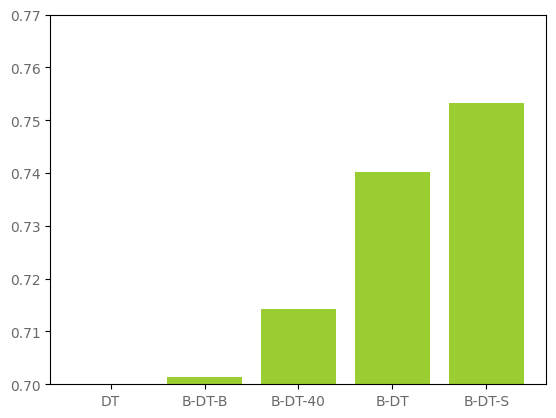

In [26]:
accuracies = [modelDT.score(X_test, y_test), bagging_DT.score(X_test, y_test), bagging_DT_40.score(X_test, y_test),
              bagging_DT_s.score(X_test, y_test), bagging_DT_b.score(X_test, y_test)]
models = ['DT', 'B-DT', 'B-DT-40', 'B-DT-S', 'B-DT-B']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='yellowgreen')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.7,0.77)
plt.show()

# <font color='#BFD72F'>3. Random Forests</font> <a class="anchor" id="forest"></a>
[Back to Contents](#toc)


We are going to apply the Random Forest Classifier to the same dataset as before `diabetes.csv`. <br>


<img src="https://drive.google.com/uc?id=1fXyKyx8t01Gd-HdYqaibjLYz1gbe6aLP" width="750px"> <img name="random_forest.png">

**Step 27 -** Import `RandomForestClassifier` from `sklearn.ensemble` and create an instance.

In [27]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()

**Step 28 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [28]:
modelRF.fit(X_train, y_train)

RandomForestClassifier()

**Step 29 -** Use the `.score()` method to obtain the mean accuracy of the given test data `X_test` and the true labels for X, `y_test`.

In [29]:
modelRF.score(X_test, y_test)

0.7467532467532467

**Step 30 -** Use the `.estimators_` attribute to obtain a list of the fitted base estimators. Check the number of Decision Trees included in the Random Forest.

In [30]:
len(modelRF.estimators_)

100

**Step 31 -** Change the number of trees in the forest to 6 using the parameter `n_estimators`.

In [31]:
modelRF_6trees = RandomForestClassifier(n_estimators=6)

**Step 32 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [32]:
modelRF_6trees.fit(X_train, y_train)

RandomForestClassifier(n_estimators=6)

**Step 33 -** Change the maximum depth of the trees to 10 by assigning the parameter `max_depth=10`.

In [33]:
modelRF_maxdepth10 = RandomForestClassifier(max_depth=10)

**Step 34 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [34]:
modelRF_maxdepth10.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

## <font color='#BFD72F' id='comp2'>3.1. Visual comparison with previous models</font>
[Back to Contents](#toc)

**Step 35 -** Create a bar plot showing the accuracy obtained by the different models built on  both the test and train sets.

In [35]:
accuracies_test = [modelDT.score(X_test, y_test),
                   bagging_DT.score(X_test, y_test),
                   bagging_DT_40.score(X_test, y_test),
                   bagging_DT_s.score(X_test, y_test),
                   bagging_DT_b.score(X_test, y_test),
                   modelRF.score(X_test, y_test),
                   modelRF_6trees.score(X_test, y_test),
                   modelRF_maxdepth10.score(X_test, y_test)]
accuracies_train = [modelDT.score(X_train, y_train),
                    bagging_DT.score(X_train, y_train),
                    bagging_DT_40.score(X_train, y_train),
                    bagging_DT_s.score(X_train, y_train),
                    bagging_DT_b.score(X_train, y_train),
                    modelRF.score(X_train, y_train),
                    modelRF_6trees.score(X_train, y_train),
                    modelRF_maxdepth10.score(X_train, y_train)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'RF', 'RF-E', 'RF-D']
data_tuples = list(zip(models,accuracies_test))
data_test = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,accuracies_train))
data_train = pd.DataFrame(data_tuples_train)

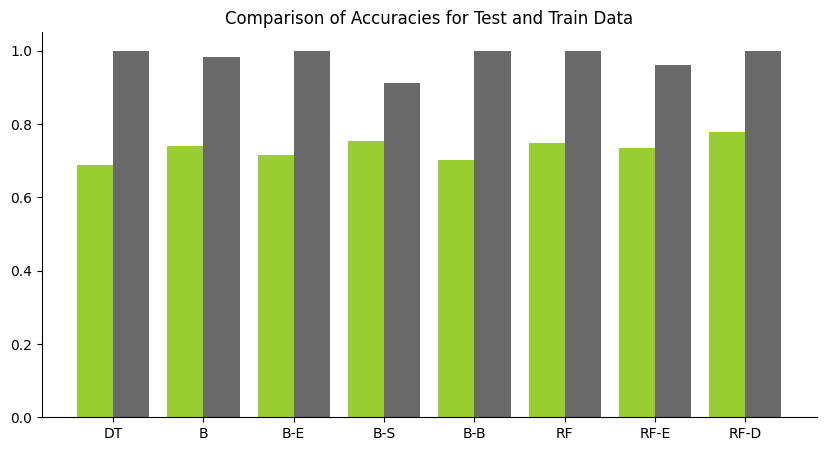

In [36]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.bar(data_test.index - 0.4/2, data_test[1], width=0.4, color='yellowgreen', label='Test Accuracy')
ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='dimgray', label='Train Accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Accuracies for Test and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)
plt.show()

# <font color='#BFD72F'>4. Boosting</font> <a class="anchor" id="boost"></a>
[Back to Contents](#toc)

We are now going to implement AdaBoost in Python.

AdaBoost combines a lot of "weak learners" to make classifications. The weak learners are almost always **stumps** (Decision Trees with a maximum depth of 1). When it comes to making the classification, the "vote" of some stumps will influence the final prediction more than others. Also, each stump is made by taking the previous stump's mistakes into consideration.


<img src="https://drive.google.com/uc?id=1kkk6SsLPVqSSMDyVRk_2low7bJ9zcjGh" width="750px"> <img name="ada_boost.png">

**Step 36 -** Import `AdaBoostClassifier` from `sklearn.ensemble` and create an instance.

In [37]:
from sklearn.ensemble import AdaBoostClassifier
aboost = AdaBoostClassifier()

**Step 37 -** Use the `.fit()`method to fit the model to the array of points `X_train` and `y_train`.

In [38]:
aboost.fit(X_train, y_train)

AdaBoostClassifier()

**Step 38 -** Use the `.estimators_` attribute to obtain a list of the fitted base estimators.

In [39]:
aboost.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1813496657),
 DecisionTreeClassifier(max_depth=1, random_state=57425068),
 DecisionTreeClassifier(max_depth=1, random_state=265751593),
 DecisionTreeClassifier(max_depth=1, random_state=2048671590),
 DecisionTreeClassifier(max_depth=1, random_state=2039980033),
 DecisionTreeClassifier(max_depth=1, random_state=1232835395),
 DecisionTreeClassifier(max_depth=1, random_state=1212516216),
 DecisionTreeClassifier(max_depth=1, random_state=234708071),
 DecisionTreeClassifier(max_depth=1, random_state=728342439),
 DecisionTreeClassifier(max_depth=1, random_state=1198096812),
 DecisionTreeClassifier(max_depth=1, random_state=1801522706),
 DecisionTreeClassifier(max_depth=1, random_state=1977012809),
 DecisionTreeClassifier(max_depth=1, random_state=1704557276),
 DecisionTreeClassifier(max_depth=1, random_state=2058225322),
 DecisionTreeClassifier(max_depth=1, random_state=796940886),
 DecisionTreeClassifier(max_depth=1, random_state=1307421742)

**Step 39 -** Use the `.score()` method to obtain the mean accuracy of the given test data `X_test` and the true labels for X, `y_test`.

In [40]:
aboost.score(X_test, y_test)

0.7532467532467533

**Step 40 -** Import `GradientBoostingClassifier` from `sklearn.ensemble` and try this model.

[Check Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [41]:
# Try at home

## <font color='#BFD72F' id='comp3'>4.1. Visual comparison with previous models</font>
[Back to Contents](#toc)

**Step 41 -** Create a bar plot showing the accuracy obtained by the different models built during this notebook on the test set.

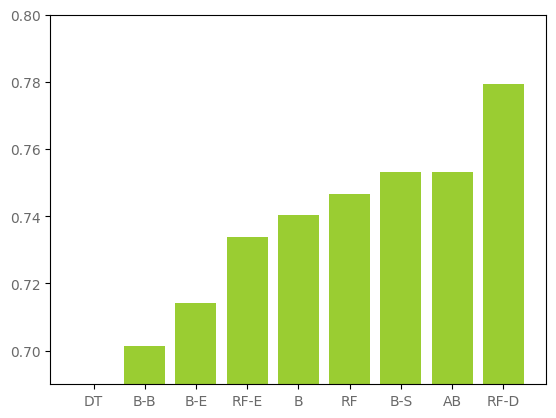

In [42]:
accuracies = [modelDT.score(X_test, y_test), bagging_DT.score(X_test, y_test), bagging_DT_40.score(X_test, y_test),
              bagging_DT_s.score(X_test, y_test), bagging_DT_b.score(X_test, y_test), modelRF.score(X_test, y_test),
              modelRF_6trees.score(X_test, y_test), modelRF_maxdepth10.score(X_test, y_test), aboost.score(X_test, y_test)]
models = ['DT', 'B', 'B-E', 'B-S', 'B-B', 'RF', 'RF-E', 'RF-D', 'AB']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1], color='yellowgreen')
plt.xticks(color='dimgray')
plt.yticks(color='dimgray')
plt.ylim(0.69,0.8)
plt.show()

# <font color='#BFD72F'>5. Stacking </font> <a class="anchor" id="stack"></a>
[Back to Contents](#toc)

Stacking is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction.

<img src="https://drive.google.com/uc?id=1GTcOsaggAqyvRWmmU-00NdSwGIZPd0M8" width="900px"> <img name="stacking_classifier.png">


**Step 42 -** Import `StackingClassifier` from `sklearn` and create an instance of it passing a set of estimators.

For more information check <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html">sklearn documentation</a>.

In [43]:
from sklearn.ensemble import StackingClassifier
base_learners = [('adb',aboost), ('rdf',modelRF)]
stacked = StackingClassifier(estimators=base_learners)

**Step 43 -** Replicate previous step, using `DecisionTreeClassifier` as meta learner.

In [44]:
from sklearn.tree import DecisionTreeClassifier
stacked_meta = StackingClassifier(estimators=base_learners, final_estimator=DecisionTreeClassifier())

**Step 44 -** Compare the score between both stacking models.

In [45]:
stacked.fit(X_train, y_train).score(X_test, y_test)

0.7792207792207793

In [46]:
stacked_meta.fit(X_train, y_train).score(X_test, y_test)

0.7272727272727273

# <font color='#BFD72F'>6. GridSearch</font> <a class="anchor" id="extra"></a>
[Back to Contents](#toc)

Models have so many parameters that it can be hard to choose the best combination. We can use GridSearch to help us.

**Step 45 -** Import `GridSearchCV` from `sklearn.model_selection`, and `DecisionTreeClassifier`, which will be the model used to apply the grid search.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

**Step 46 -** Create and an instance of the `DecisionTreeClassifier`. Then, define some parameters you would find useful to explore in a dictionary called `parameters`.

In [48]:
modelDT_grid = DecisionTreeClassifier()
parameters = {'max_depth':list(range(1,10)),
              'min_samples_split':list(range(20,30))}

 **Step 47 -** Create an instance of the `GridSearchCV` with the previously created model and parameters. Fit the Grid search to the training data.

In [ ]:
grid = GridSearchCV(modelDT_grid, parameters)
grid.fit(X_train, y_train)

**Step 48 -** Check the grid search results by using the method `cv_results_`.

In [ ]:
grid.cv_results_

In [ ]:
grid.best_estimator_

In [ ]:
grid.score(X_test, y_test)

<b><font size="6"> Don't forget to practice at home &#128521;</font>